<a href="https://www.kaggle.com/code/murtaza0125/mnist-dataset-classification-through-tensorflow?scriptVersionId=123498214" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [7]:
X_train.min(), X_train.max(), y_train.min(), y_test.max()

(0, 255, 0, 9)

In [8]:
np.unique(X_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Label:2


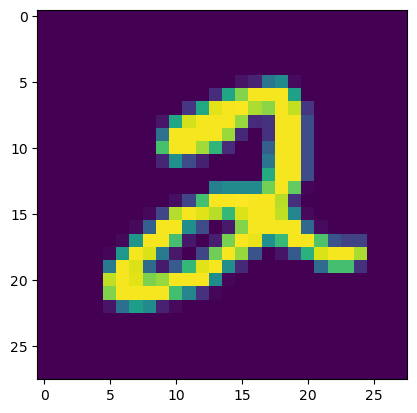

In [10]:
x=5
print(f'Label:{y_train[x]}')
plt.imshow(X_train[x])
plt.show()

# Data Preprocessing

In [11]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [12]:
np.unique(X_train)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [13]:
# Normalize

X_train = X_train/255
X_test = X_test/255

In [14]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [15]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [16]:
# one hot encoding of y

from tensorflow.keras.utils import to_categorical

In [17]:
y_train = to_categorical(y_train, num_classes=10)

In [18]:
y_test = to_categorical(y_test, num_classes=10)

In [19]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Build the Model

In [20]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

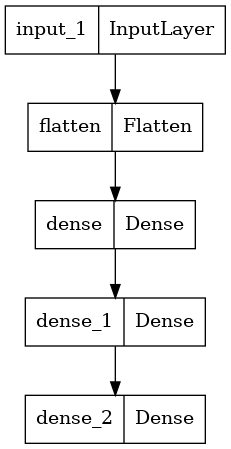

In [21]:
model = Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

plot_model(model)
    

In [22]:
model.compile(optimizer=Adam(learning_rate=0.1), loss=('categorical_crossentropy'), metrics='accuracy')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train, y_train, batch_size=1000, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
60/60 [==============================] - 2s 15ms/step - loss: 1.7321 - accuracy: 0.4078 - val_loss: 1.0559 - val_accuracy: 0.6266
Epoch 2/100
60/60 [==============================] - 0s 7ms/step - loss: 0.8505 - accuracy: 0.7138 - val_loss: 0.6693 - val_accuracy: 0.7802
Epoch 3/100
60/60 [==============================] - 0s 6ms/step - loss: 0.6347 - accuracy: 0.8132 - val_loss: 0.5638 - val_accuracy: 0.8472
Epoch 4/100
60/60 [==============================] - 0s 7ms/step - loss: 0.5431 - accuracy: 0.8499 - val_loss: 0.5351 - val_accuracy: 0.8577
Epoch 5/100
60/60 [==============================] - 0s 6ms/step - loss: 0.5034 - accuracy: 0.8621 - val_loss: 0.5476 - val_accuracy: 0.8511
Epoch 6/100
60/60 [==============================] - 0s 6ms/step - loss: 0.4801 - accuracy: 0.8691 - val_loss: 0.4906 - val_accuracy: 0.8658
Epoch 7/100
60/60 [==============================] - 0s 6ms/step - loss: 0.4688 - accuracy: 0.8708 - val_loss: 0.4840 - val_accuracy: 0.8670
Epoch 8/100
